In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
hr = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv')
hr_dummies = pd.get_dummies(hr)


train, test = train_test_split(hr_dummies,
                               test_size=0.3,
                               random_state=100)

In [4]:
def draw_tree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    import os
    from sklearn import tree
    
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path

    dot_data = StringIO()
    tree.export_graphviz(model,
                         out_file=dot_data,
                         feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

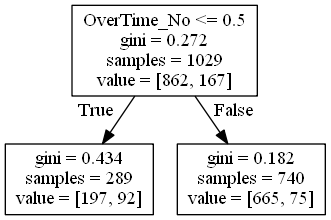

In [6]:
train_x = train.drop('Attrition', axis=1)
train_y = train['Attrition']

test_x = test.drop('Attrition', axis=1)
test_y = test['Attrition']

model = DecisionTreeClassifier(random_state=100, max_depth=1)
model.fit(train_x, train_y)
draw_tree(model, train_x.columns)

In [7]:
pred_test = model.predict(test_x)
pred_results = pd.DataFrame({
    'actual': test_y,
    'predicted': pred_test
})
#(pred_results['actual'] == pred_results['predicted']).sum() / test.shape[0]

from sklearn.metrics import accuracy_score
accuracy_score(pred_results['actual'], pred_results['predicted'])

0.8412698412698413

In [8]:
### True Negative
pred_results[(pred_results['predicted']==0) & 
             (pred_results['actual']==0)].shape

(371, 2)

In [9]:
### True Positive
pred_results[(pred_results['predicted']==1) & 
             (pred_results['actual']==1)].shape

(0, 2)

In [10]:
### False Positive
pred_results[(pred_results['predicted']==1) & 
             (pred_results['actual']==0)].shape

(0, 2)

In [11]:
### False Negative
pred_results[(pred_results['predicted']==0) & 
             (pred_results['actual']==1)].shape

(70, 2)

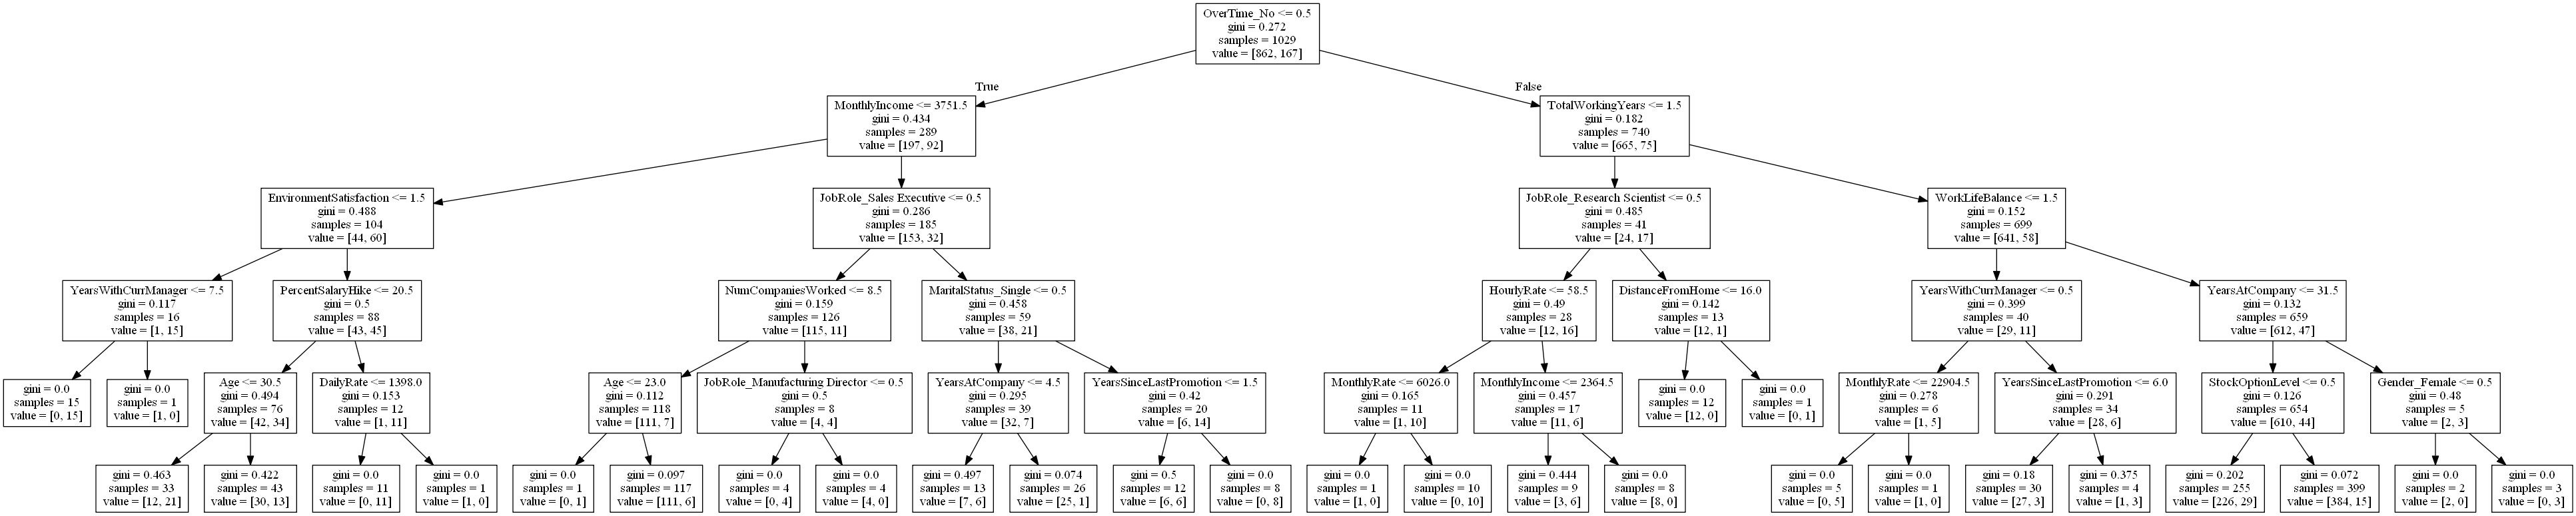

In [12]:
train_x = train.drop('Attrition', axis=1)
train_y = train['Attrition']

test_x = test.drop('Attrition', axis=1)
test_y = test['Attrition']

model = DecisionTreeClassifier(random_state=100, max_depth=5)
model.fit(train_x, train_y)
draw_tree(model, train_x.columns)

In [13]:
pred_test = model.predict(test_x)
pred_results = pd.DataFrame({
    'actual': test_y,
    'predicted': pred_test
})
#(pred_results['actual'] == pred_results['predicted']).sum() / test.shape[0]

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(pred_results['actual'], pred_results['predicted'])

tn,fp,fn,tp= confusion_matrix(pred_results['actual'],pred_results['predicted']).ravel()#to flatten the matrix(convert 2D array to 1D)

print(classification_report(pred_results['actual'],pred_results['predicted']))

#precision is taken as specificity
#recall is taken as sensitivity

             precision    recall  f1-score   support

          0       0.88      0.95      0.91       371
          1       0.54      0.31      0.40        70

avg / total       0.83      0.85      0.83       441



## Random Forest 

In [14]:
seed=50
train,test=train_test_split(hr_dummies,test_size=0.3,random_state=seed)

train_x = train.drop('Attrition', axis=1)
train_y = train['Attrition']

test_x = test.drop('Attrition', axis=1)
test_y = test['Attrition']

model = DecisionTreeClassifier(random_state=seed, max_depth=5)
model.fit(train_x, train_y)
print(model.predict([hr_dummies.loc[100].drop('Attrition')]))
#draw_tree(model, train_x.columns)

pred_test = model.predict(test_x)
pred_results = pd.DataFrame({
    'actual': test_y,
    'predicted': pred_test
})
pred_results.head()

[1]


,actual,predicted
264,1,0
1116,0,1
1354,1,0
1143,0,0
349,0,0


In [15]:
hr_dummies.loc[100]

Age                                     37
Attrition                                1
DailyRate                              807
DistanceFromHome                         6
Education                                4
EmployeeCount                            1
EmployeeNumber                         133
EnvironmentSatisfaction                  3
HourlyRate                              63
JobInvolvement                           3
JobLevel                                 1
JobSatisfaction                          1
MonthlyIncome                         2073
MonthlyRate                          23648
NumCompaniesWorked                       4
PercentSalaryHike                       22
PerformanceRating                        4
RelationshipSatisfaction                 4
StandardHours                           80
StockOptionLevel                         0
TotalWorkingYears                        7
TrainingTimesLastYear                    3
WorkLifeBalance                          3
YearsAtComp

In [21]:
train, test = train_test_split(hr_dummies,
                              test_size = 0.3,
                              random_state = 100)

train_x = train.drop('Attrition', axis = 1)
train_y = train['Attrition']

test_x = test.drop('Attrition', axis = 1)
test_y = test['Attrition']

predictions=[]
for i in range(300):

    # Random Pick Row
    samples_dt1 = train_x.sample(1029, replace = True)
    samples_dt1.shape

    # Randomly picks the columns
    all_columns = pd.Series(train_x.columns)
    ncols = int(np.sqrt(len(all_columns)))
    #print(ncols)
    random_columns = all_columns.sample(ncols).values
    random_columns

    samples_dt1 = samples_dt1[random_columns]
    samples_dt1

    # we will not use max_depth as we want the random forest to grow completely. althought it would be biased still we will be using it
    model = DecisionTreeClassifier()
    model.fit(samples_dt1, train_y.loc[samples_dt1.index])
    pred = model.predict([test_x.iloc[0][random_columns]])[0]
    predictions.append(pred)
    #print(pred)
pd.Series(predictions).value_counts()

0    236
1     64
dtype: int64

In [36]:
population=pd.Series(list(range(100)))
population.sample(100,replace=True).nunique()

62

In [38]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=100,n_estimators=300)
model_rf.fit(train_x,train_y)
pred=model_rf.predict(test_x)
print(accuracy_score(test_y,pred))
print(classification_report(test_y, pred))

0.8594104308390023
             precision    recall  f1-score   support

          0       0.86      0.99      0.92       371
          1       0.79      0.16      0.26        70

avg / total       0.85      0.86      0.82       441

